# Importation des données

In [189]:
import os
import string
import re
import math 
from math import sqrt
os.chdir('/Users/alainquartierlatente/Desktop/Ensae/StatApp')
print(string.punctuation + "'’")
def mise_en_forme_phrase (phrase):
    phrase = phrase.lower()
    # On elève la ponctuation mais ça peut se discuter (garder les @ et #?)
    phrase = phrase.translate(str.maketrans('', '', string.punctuation + "'’"))
    # On enlève les passages à la ligne
    phrase = re.sub('\\n', ' ', phrase)
    # On enlève les espaces multiples et les espaces à la fin des phrases
    phrase = re.sub(' +', ' ', phrase)
    phrase = re.sub(' +$', '', phrase)
    return(phrase.split())
#f = open('data/sample_3.txt')
#raw = f.read()
#print(type(raw))
with open('data/sample_3.txt') as myfile:
    phrases = [mise_en_forme_phrase(next(myfile)) for x in range(10000)]
print(phrases[0:10])
#raw = ''.join([''.join(phrase) for phrase in phrases])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'’
[['il', 'mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'de', 'l', 'alphabet'], ['reinedonna', 'et', 'fière', 'je', 't', 'en', 'voi', 'att', 'j', 'avais', 'oublié'], ['il', 'est', '1', 'heure'], ['eeeeh', 'jfais', 'la', 'go', 'qui', 'a', 'de', 'les', 'programmes', 'mais', 'j', 'ai', 'même', 'pas', 'de', 'navigo', 'ptdddddr', '😭'], ['en', 'tout', 'cas', 'la', 'demoiselle', 'a', 'bien', 'raison'], ['le', 'rathalos', 'est', 'un', 'gros', 'fils', 'de', 'pute', 'bonne', 'nuit'], ['stephanielevy75', 'et', 'puis', 'un', 'jour', 'pfffffffffus', 'rien', 'ne', 'fonctionne', 'l', 'humain', 'se', 'meurt', 'à', 'petit', 'feu'], ['rebeudeter', 'je', 'veux', 'pas', 'en', 'savoir', 'sasuke', 'j', 'sais', 'pas', 'qui', 'c', 'est', 'mais', 'j', 'crois', 'il', 'est', 'sombre'], ['à', 'partir', 'de', 'quand', 'peut', 'on', 'se', 'qualifier', 'de', 'fan'], ['go', 'profité', 'de', 'les', '6h20', 'de', 'sommeil', 'qu', 'il', 'me', 'reste']]


In [191]:
import nltk, re, pprint
#nltk.download('punkt')
from nltk import word_tokenize
# words = word_tokenize(raw) # Plus utile maintenant
words = [item for sublist in phrases for item in sublist]
print(type(words))
## On enlève la ponctuation et on met en minuscule :
#words = [word.lower() for word in words if word.isalpha()] # plus utile maintenant
vocabulary = set(words)

<class 'list'>


In [192]:
print("Nombre de mots :", len(words))
print("Taille du vocabulaire :", len(vocabulary))

Nombre de mots : 111627
Taille du vocabulaire : 19307


Les 10 mots les plus communs sont :
[('de', 3954), ('le', 2558), ('est', 2147), ('je', 2037), ('les', 1813), ('j', 1785), ('à', 1725), ('c', 1693), ('la', 1622), ('pas', 1582)]


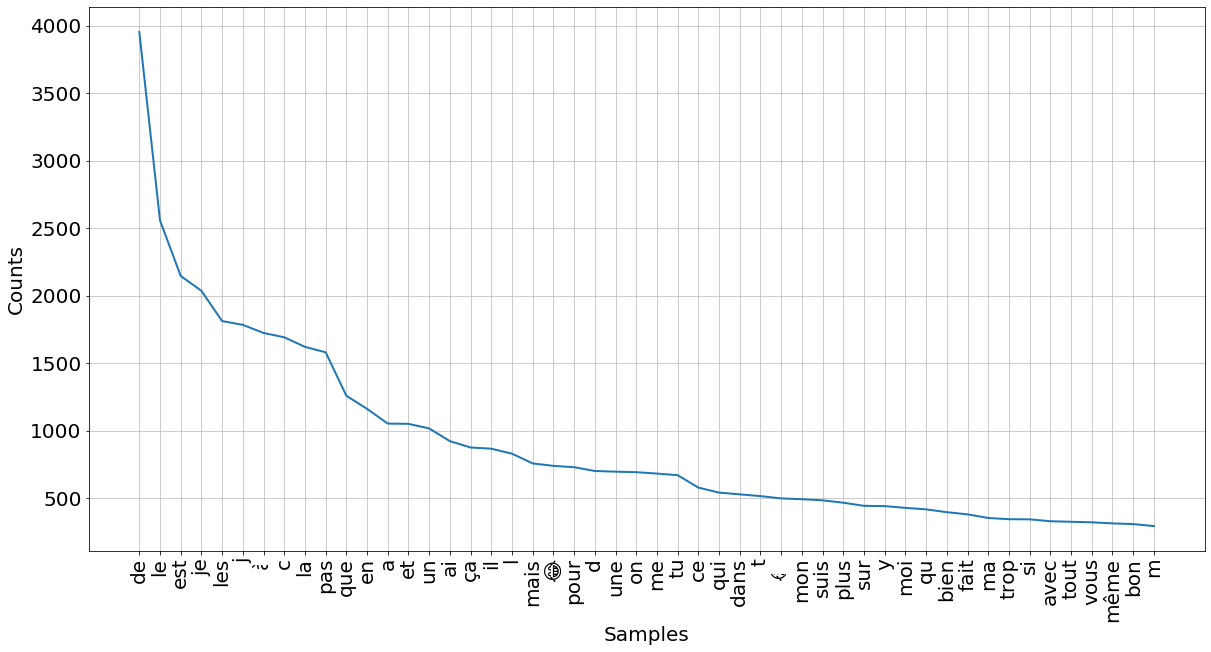

In [202]:
# Pour changer la taille des graphiques :
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 20

fdist = nltk.FreqDist(words)
print("Les 10 mots les plus communs sont :")
print(fdist.most_common(10))
fdist.plot(50)

# Sampling rate
On va simplifier un peu le corpus en enlevant certains mots. Pour cela on va faire un sous-échantillonnage du corpus pour supprimer certains mots. 

Pour chaque mot $w_i$ on note $z(w_i)$ la proportion d'apparition de ce mot, c'est-à-dire le rapport entre le nombre de fois que ce mot apparait et le nombre total de mots. La probabilité de garder un mot le mot $w_i$ est :
$$
\mathbb P(w_i) = \left(\sqrt{\frac{z(w_i)}{q}} + 1 \right)
\times
\frac{q}{z(w_i)}
$$
Le paramètre $q$ est appelé "sample" – échantillonnage – contrôle le nombre de sous-échantillonnages. La valeur par défaut est 0,001.

In [152]:
import numpy as np
import random
random.seed(1)
def calcul_proba(x):
    result = (sqrt(x)+1)*(1/x)
    if(result > 1):
        result = 1
    return(result)
calcul_proba_v = np.vectorize(calcul_proba)

def sub_sampling(phrases, sample = 0.001):
    words = [item for sublist in phrases for item in sublist]
    fdist = nltk.FreqDist(words)
    vocabulary = set(words)
    proportion = np.array([(fdist[w]/ (len(words) * sample)) for w in vocabulary])
    
    probabilities = calcul_proba_v(proportion)
    probabilities
    #On génère len(probabilities) loi uniforme sur [0,1]
    runif = np.random.uniform(low=0.0, high=1.0, size=len(probabilities))
    # Les mots à supprimer sont les mots tels que la loi générée soit > proba
    mots_a_supprimer = {w for (i, w) in enumerate(vocabulary) if probabilities[i] > runif[i]}
    nouveau_corpus = [] 

    for phrase in phrases: #on parcourt tous les articles du corpus
        nouveau_corpus.append([]) #on crée une sous liste à chaque nouvel article
        for word in phrase: #et pour tous les mots de l'article
            if word not in mots_a_supprimer:
                nouveau_corpus[-1].append(word)
    return(nouveau_corpus)
phrases2 = sub_sampling(phrases)
print(phrases[0:10])
print(phrases2[0:10])

[['il', 'mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'de', 'l', 'alphabet'], ['reinedonna', 'et', 'fière', 'je', 't', 'en', 'voi', 'att', 'j', 'avais', 'oublié'], ['il', 'est', '1', 'heure'], ['eeeeh', 'jfais', 'la', 'go', 'qui', 'a', 'de', 'les', 'programmes', 'mais', 'j', 'ai', 'même', 'pas', 'de', 'navigo', 'ptdddddr', '😭'], ['en', 'tout', 'cas', 'la', 'demoiselle', 'a', 'bien', 'raison'], ['le', 'rathalos', 'est', 'un', 'gros', 'fils', 'de', 'pute', 'bonne', 'nuit'], ['stephanielevy75', 'et', 'puis', 'un', 'jour', 'pfffffffffus', 'rien', 'ne', 'fonctionne', 'l', 'humain', 'se', 'meurt', 'à', 'petit', 'feu'], ['rebeudeter', 'je', 'veux', 'pas', 'en', 'savoir', 'sasuke', 'j', 'sais', 'pas', 'qui', 'c', 'est', 'mais', 'j', 'crois', 'il', 'est', 'sombre'], ['à', 'partir', 'de', 'quand', 'peut', 'on', 'se', 'qualifier', 'de', 'fan'], ['go', 'profité', 'de', 'les', '6h20', 'de', 'sommeil', 'qu', 'il', 'me', 'reste']]
[['il', 'd', 'la', 'de', 'l'], ['et', 'je', 't', 'en', 'j'], ['il'

# Génération de l'échantillon de test
Comment on gère les doublons ?

In [186]:
words = [item for sublist in phrases2 for item in sublist]
vocabulary = list(set(words))

def create_sample(phrases, vocabulary, window = 2):
    test_sample = []
    for phrase in phrases:
        for i in list(range(0, len(phrase))):
            index_i = vocabulary.index(phrase[i])
            for j in list(range(max(i-window,0), min(i+window+1, len(phrase)))):
                if(j != i):
                    index_j = vocabulary.index(phrase[j])
                    test_sample.append([index_i, index_j])
    return(test_sample)
def create_sample_word(phrases, vocabulary, window = 2):
    test_sample = []
    for phrase in phrases:
        for i in list(range(0, len(phrase))):
            for j in list(range(max(i-window,0), min(i+window+1, len(phrase)))):
                if(j != i):
                    test_sample.append([phrase[i], phrase[j]])
    return(test_sample)

test_sample = create_sample(phrases2, vocabulary)
test_sample_w = create_sample_word(phrases2, vocabulary)
test_sample_w[:10]

[['il', 'd'],
 ['il', 'la'],
 ['d', 'il'],
 ['d', 'la'],
 ['d', 'de'],
 ['la', 'il'],
 ['la', 'd'],
 ['la', 'de'],
 ['la', 'l'],
 ['de', 'd']]